# POC in a word perspective

## Main Algorithm:

1. Lemmatization

2. Protect stop words


3. // words (key phrases)   
Do:   
	Look for similar words (DBSCAN)   
Replace with centroid / one of the members   
Until Embedding distance is too high or utilization is too low.   


4. // sentences   
While K-anonymity is not reached:   
Find most similar sentences (Jaccard distance)   
Force them to be similar   

5. Do some utilization test / give some stats…


In [46]:
# For VSCODE
%reload_ext autoreload
%autoreload 2

## 0) Upload data

Import libraries

In [47]:
import pandas as pd

Import project files

In [48]:
#import sys
#sys.path.append("utils")
# from utils import models

In [49]:
from utils import nlp_utils, cluster_utils, utilization_utils, anonym_utils

Uploading data

In [50]:
train_file = 'data/df_filtered.csv'

Getting dataframe

In [51]:
%%time
# Getting the df
#df = reading_bz_file(train_file)
df = pd.read_csv(train_file)

CPU times: total: 31.2 ms
Wall time: 64 ms


## 1+2) Lemmatizing and protecting stopwords

Defining the word dictionary

In [52]:
%%time
word_dict = nlp_utils.create_word_dict(df['txt'])
word_list = cluster_utils.get_word_list_for_clustering(word_dict)

CPU times: total: 34.6 s
Wall time: 46.9 s


## 3) Word replacement

### 3.1) Clustering using DBSCAN

#### 3.1.1) Using DBSCAN with the default euclidean distance

Clustering

eps 1.7470940577096514
CPU times: total: 5.36 s
Wall time: 6.79 s


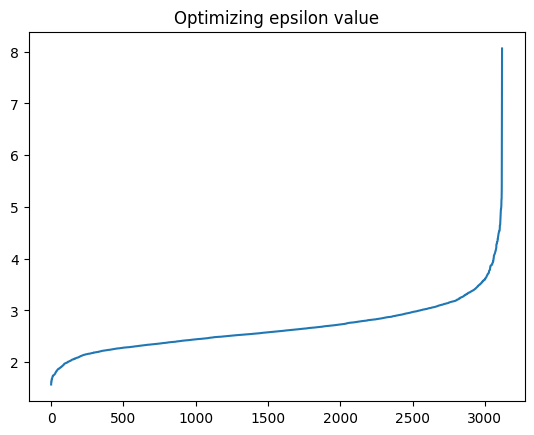

In [53]:
%%time
embedded_dict = cluster_utils.embed_corpus(word_list)
cluster_dict, dist_dict, labels = cluster_utils.run_clustering(embedded_dict)

In [54]:
#for key, val in dist_dict_2.items():
#    print('dist 1:', dist_dict[key], '\tdist 2:', dist_dict_2[key])

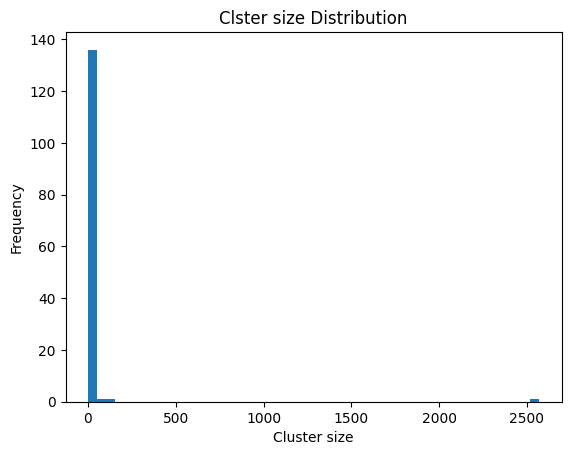

In [55]:
cluster_utils.plot_cluster_size_distribution(cluster_dict)

Plotting tSNE

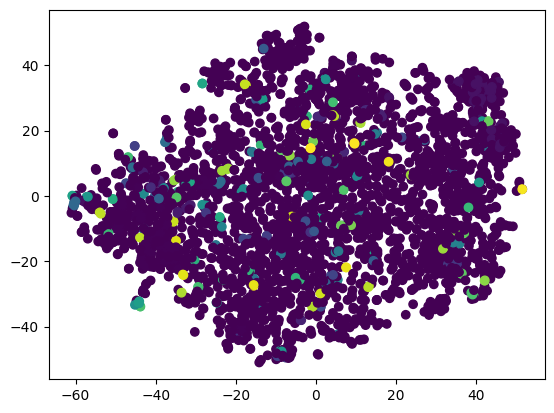

CPU times: total: 1min 36s
Wall time: 40.5 s


In [56]:
%%time
cluster_utils.plot_tsne(embedded_dict, labels)

#### 3.1.2) Using DBSCAN with cosine distance

Testing DBSCAN with cosine metric

eps 0.053744018


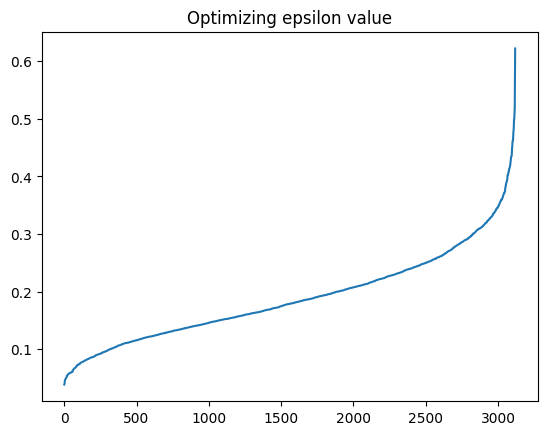

In [57]:
cluster_dict_cos, dist_dict_cos, labels_cos = cluster_utils.run_clustering(embedded_dict, cosine=True)

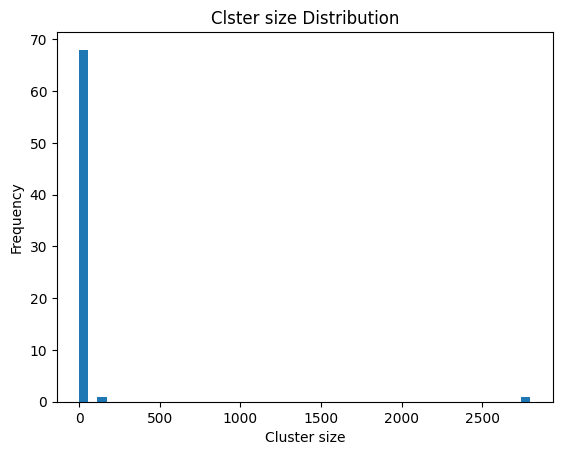

In [58]:
cluster_utils.plot_cluster_size_distribution(cluster_dict_cos)

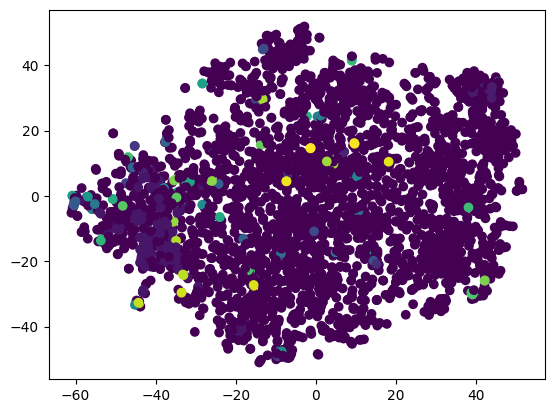

CPU times: total: 1min 33s
Wall time: 43.2 s


In [59]:
%%time
cluster_utils.plot_tsne(embedded_dict, labels_cos)

#### 3.1.3) Using HDBSCAN with UMAP

In [60]:
cluster_dict_h, dist_dict_h, labels_h = cluster_utils.run_clustering_hdbscan(embedded_dict)

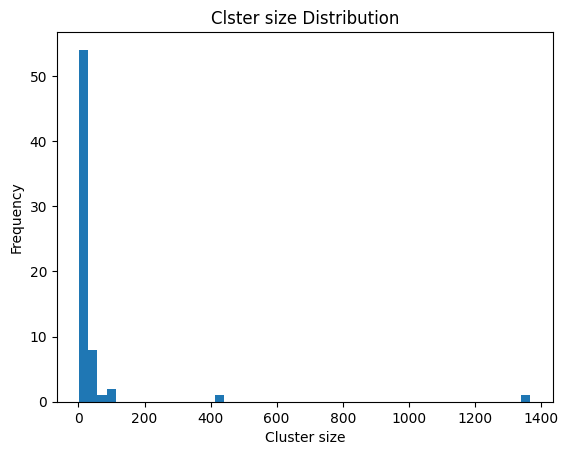

In [61]:
cluster_utils.plot_cluster_size_distribution(cluster_dict_h)

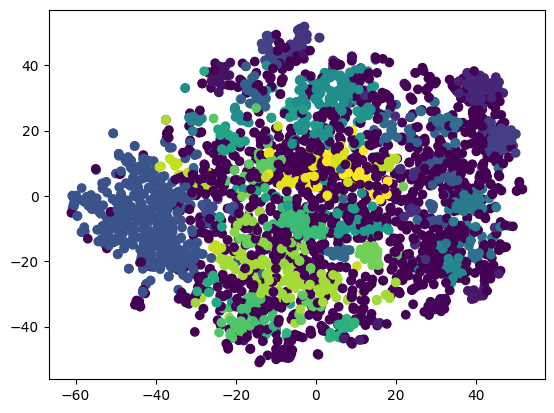

In [62]:
cluster_utils.plot_tsne(embedded_dict, labels_h)

#### 3.1.4) Comapirson

In [63]:
print('Euclidian distance:\t', len(cluster_dict), 'clusters')
print('Cosine distance:\t', len(cluster_dict_cos), 'clusters')
print('HDBSCAN clustering:\t', len(cluster_dict_h), 'clusters')

Euclidian distance:	 139 clusters
Cosine distance:	 70 clusters
HDBSCAN clustering:	 67 clusters


Plotting Jaccard index histogram

In [64]:
test_dict = nlp_utils.create_word_dict(['hi, how are you?', 'I love chocolate', 'I love banana', 'he loves cola'])
test_list = cluster_utils.get_word_list_for_clustering(test_dict)
test_list

['cola', 'banana', 'hi', 'love', 'chocolate']

Getting distance threshold

In [65]:
threshold = cluster_utils.define_max_threshold()
threshold

sim_list_best 0.82521856
sim_list_worst 0.56748897


0.3036462366580963

### 3.2) replacing words in documents

#### 3.2.1) Based on Eucledian distance

In [66]:
######################### TEMP #######################
#df = df[:30]

Starting average Jaccard index: 0.21917328671200118
Distance threshold: 0.3036462366580963
distance: 0.33540606 the next cluster is too wide and wont be replaced: ['least', 'necessary', 'find', 'reason', 'guess', 'king', 'absolutely', 'much', 'anything', 'else', 'shame', 'rather', 'whether', 'mad', 'think', 'unless', 'surprised', 'probably', 'old', 'obviously', 'doubt', 'need', 'kid', 'mean', 'four', 'definitely', 'lady', 'run', 'turn', 'apparently', 'still', 'something', 'talk', 'lot', 'could', 'although', 'burn', 'guy', 'exactly', 'dude', 'anyone', 'wrong', 'way', 'remind', 'basically', 'bring', 'let', 'hear', 'queen', 'yes', 'bad', 'high', 'give', 'hit', 'pull', 'except', 'either', 'actually', 'understand', 'know', 'happen', 'however', 'crazy', 'perhaps', 'see', 'five', 'remember', 'princess', 'otherwise', 'baby', 'side', 'jump', 'always', 'anyway', 'catch', 'take', 'make', 'blow', 'wow', 'many', 'normally', 'tell', 'hell', 'well', 'expect', 'prince', 'sure', 'enough', 'especially',

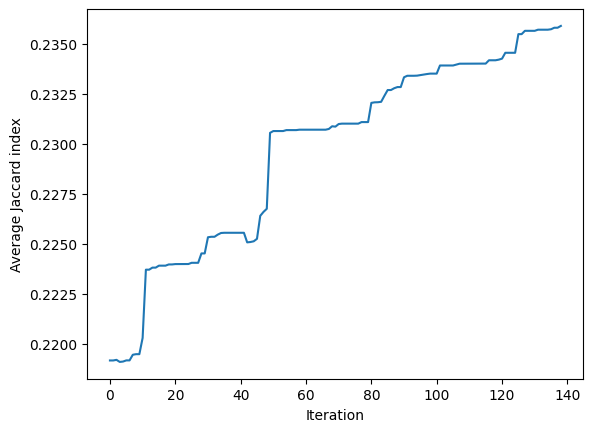

In [67]:
%%time
df_2, word_dict_2 = nlp_utils.replace_words_in_df(df, cluster_dict, dist_dict, threshold, word_dict)

In [68]:
df_2

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history
0,58,hunting the hard way: thia was a gift for my h...,1,25,hunt the hard way : thia was a gift for my wom...,{hunt} (the) hard way: thia (was) (a) gift (fo...
1,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : i have a copy of this bo...,{voice} (from) (the) farm: (i) (have) (a) copy...
2,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o..."
3,100,textbook: book shipped quickly and was in exce...,1,16,textbook : book ship quickly and was in excell...,textbook: book {ship} quickly (and) (was) (in)...
4,135,great graphics!: 2006 coast to coast for pc is...,1,26,great graphic ! : 2006 north to north for pc i...,great {graphic} 2006 [north] (to) [north] (for...
...,...,...,...,...,...,...
1545,41151,nice: this book gives you the right material f...,1,26,nice : this book give you the right material f...,nice: (this) book {give} (you) (the) right mat...
1546,41156,difficult for a lay person: i found this book ...,0,24,difficult for a lay person : i find this book ...,difficult (for) (a) lay person: (i) {find} (th...
1547,41255,very funny book: i originally stumbled across ...,1,27,very funny book : i originally stumble across ...,(very) funny book: (i) originally {stumble} ac...
1548,41258,awesome plot!: hasselhoff has a dream sequence...,1,22,great plot ! : hasselhoff has a dream sequence...,[great] plot!: hasselhoff (has) (a) dream sequ...


#### 3.2.2) Based on Cosine distance

Starting average Jaccard index: 0.21917328671200118
Distance threshold: 0.3036462366580963
distance: 0.17720434 	replacing ['plz', 'pls', 'please'] in notice
distance: 0.118350156 	replacing ['often', 'usually'] in rarely
distance: 0.16536334 	replacing ['brother', 'friend', 'mom', 'sister', 'dad'] in daddy
distance: 0.33119315 the next cluster is too wide and wont be replaced: ['find', 'night', 'summer', 'first', 'reason', 'guess', 'hopefully', 'last', 'absolutely', 'much', 'anything', 'else', 'yesterday', 'rather', 'whether', 'mad', 'since', 'think', 'able', 'unless', 'surprised', 'probably', 'finally', 'obviously', 'doubt', 'need', 'day', 'mean', 'four', 'definitely', 'turn', 'apparently', 'still', 'something', 'talk', 'lot', 'could', 'already', 'second', 'although', 'exactly', 'year', 'dude', 'anyone', 'wrong', 'way', 'remind', 'basically', 'people', 'bring', 'stupid', 'ill', 'let', 'hear', 'bad', 'give', 'next', 'except', 'never', 'either', 'actually', 'understand', 'know', 'happe

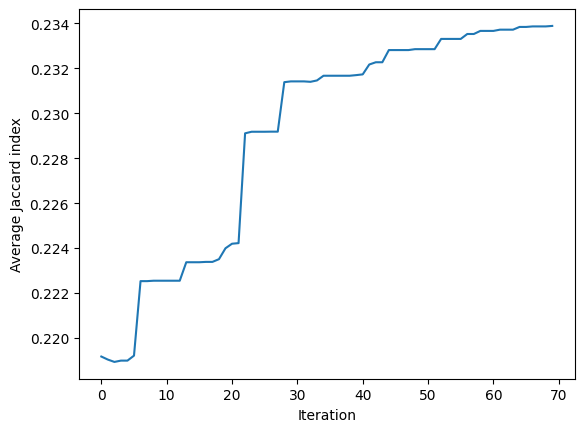

In [69]:
%%time
df_3, word_dict_3 = nlp_utils.replace_words_in_df(df, cluster_dict_cos, dist_dict_cos, threshold, word_dict)

In [70]:
df_3

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history
0,58,hunting the hard way: thia was a gift for my h...,1,25,hunt the hard way : thia was a gift for my gra...,{hunt} (the) hard way: thia (was) (a) gift (fo...
1,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : i have a copy of this bo...,{voice} (from) (the) farm: (i) (have) (a) copy...
2,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o..."
3,100,textbook: book shipped quickly and was in exce...,1,16,textbook : book ship quickly and was in excell...,textbook: book {ship} quickly (and) (was) (in)...
4,135,great graphics!: 2006 coast to coast for pc is...,1,26,great graphic ! : 2006 north to north for pc i...,great {graphic} 2006 [north] (to) [north] (for...
...,...,...,...,...,...,...
1545,41151,nice: this book gives you the right material f...,1,26,nice : this book give you the right material f...,nice: (this) book {give} (you) (the) right mat...
1546,41156,difficult for a lay person: i found this book ...,0,24,difficult for a lay person : i find this book ...,difficult (for) (a) lay person: (i) {find} (th...
1547,41255,very funny book: i originally stumbled across ...,1,27,very funny book : i originally stumble across ...,(very) funny book: (i) originally {stumble} ac...
1548,41258,awesome plot!: hasselhoff has a dream sequence...,1,22,great plot ! : hasselhoff has a dream sequence...,[great] plot!: hasselhoff (has) (a) dream sequ...


#### 3.2.3) Based on HDBSCAN clustering

Starting average Jaccard index: 0.21917328671200118
Distance threshold: 0.3036462366580963
distance: 0.3395988 the next cluster is too wide and wont be replaced: ['katharine', 'jrr', 'pacino', 'sedaris', 'verne', 'antoinette', 'swayze', 'garwood', 'deepak', 'rueben', 'sherry', 'coltrane', 'hutton', 'kinsey', 'ansel', 'phelan', 'carnegie', 'lightfoot', 'langston', 'kerouac', 'cornwell', 'aiken', 'sherryl', 'routledge', 'devlin', 'constantine', 'devito', 'lorna', 'grisham', 'huxley', 'faulkner', 'dewey', 'browne', 'myer', 'boyer', 'jonestown', 'paxton', 'peggy', 'asimov', 'bunyan', 'hasselhoff', "o'connor", 'quigley', 'wilkerson']
distance: 0.2995172 	replacing ['mrs', 'captain', 'ann', 'keith', 'johnson', 'usher', 'mike', 'tony', 'jim', 'mason', 'russell', 'mario', 'albert', 'ray', 'ross', 'reed', 'james', 'ft', 'thomas', 'david', 'turner', 'matthew', 'henry', 'smith', 'roger', 'quentin', 'courtney', 'robert', 'joe', 'kenny', 'michael', 'wayne', 'duke', 'christopher', 'patrick', 'rebecc

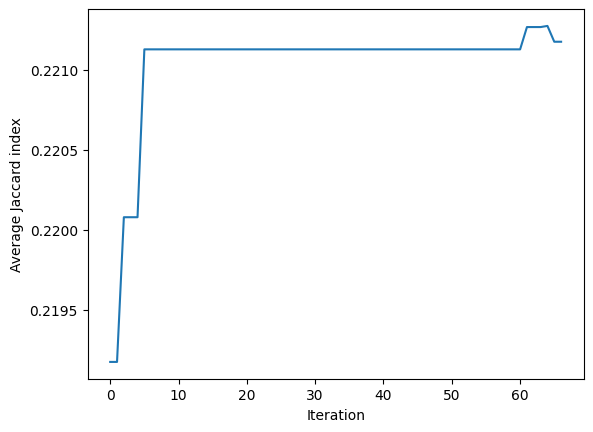

In [71]:
%%time
df_4, word_dict_4 = nlp_utils.replace_words_in_df(df, cluster_dict_h, dist_dict_h, threshold, word_dict)

In [72]:
df_4

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history
0,58,hunting the hard way: thia was a gift for my h...,1,25,hunt the hard way : thia was a gift for my hus...,{hunt} (the) hard way: thia (was) (a) gift (fo...
1,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : i have a copy of this bo...,{voice} (from) (the) farm: (i) (have) (a) copy...
2,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o..."
3,100,textbook: book shipped quickly and was in exce...,1,16,textbook : book ship quickly and was in excell...,textbook: book {ship} quickly (and) (was) (in)...
4,135,great graphics!: 2006 coast to coast for pc is...,1,26,great graphic ! : 2006 coast to coast for pc i...,great {graphic} 2006 [north] (to) [north] (for...
...,...,...,...,...,...,...
1545,41151,nice: this book gives you the right material f...,1,26,nice : this book give you the right material f...,nice: (this) book {give} (you) (the) right mat...
1546,41156,difficult for a lay person: i found this book ...,0,24,seems for a lay person : i find this book was ...,[seems] (for) (a) lay person: (i) {find} (this...
1547,41255,very funny book: i originally stumbled across ...,1,27,very funny book : i originally stumble across ...,(very) funny book: (i) originally {stumble} ac...
1548,41258,awesome plot!: hasselhoff has a dream sequence...,1,22,awesome plot ! : hasselhoff has a dream sequen...,[great] plot!: hasselhoff (has) (a) dream sequ...


Looking at the histogram again

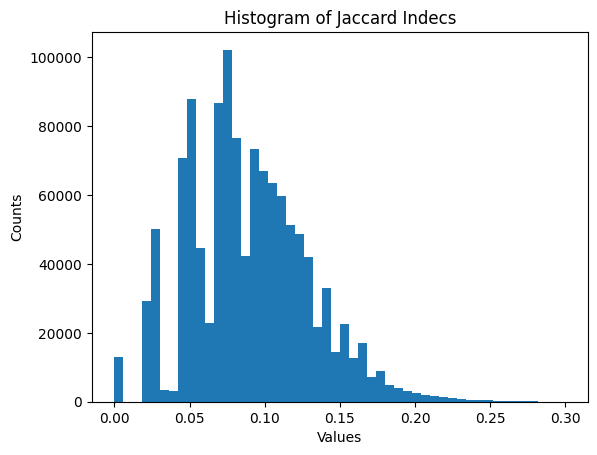

CPU times: total: 19.5 s
Wall time: 20.5 s


In [73]:
%%time
nlp_utils.plot_jaccard_hist(df_2, column='txt')

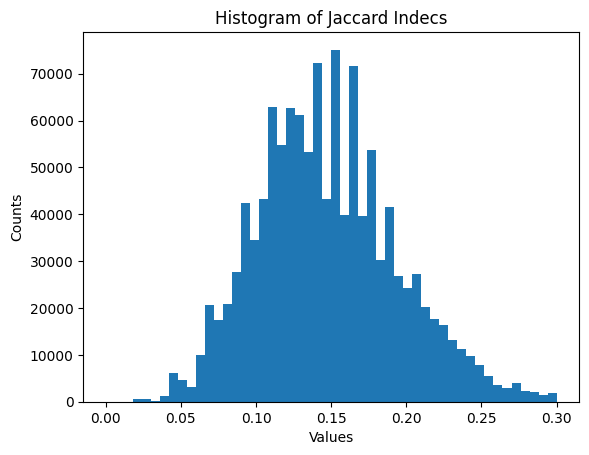

CPU times: total: 20.5 s
Wall time: 22.1 s


In [74]:
%%time
nlp_utils.plot_jaccard_hist(df_2, 'anon_txt')

In [75]:
print('Eucolidian dist:\t', df_2.iloc[3, 4])
print('Cosine dist:\t\t', df_3.iloc[3, 4])
print('HDNSCAN:\t\t', df_4.iloc[3, 4])

Eucolidian dist:	 textbook : book ship quickly and was in excellent condition as state . easy transaction would free again
Cosine dist:		 textbook : book ship quickly and was in excellent condition as state . easy transaction would free again
HDNSCAN:		 textbook : book ship quickly and was in excellent condition as state . easy transaction would buy again


## 4) Force anonymity

### Get anonymity degree

Before replacement

In [76]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(docs=df_2['txt'])
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['txt']))

Current k: 1 	number of un-anonym. documents: 1548 	number of all documents: 1550


After replacement

In [77]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(docs=df_2['anon_txt'])
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['anon_txt']))

Current k: 1 	number of un-anonym. documents: 1548 	number of all documents: 1550


### 4.1) Method 1 - Forcing Anonymity by Finding the nearest k neighbors
Steps:
1. Finding k nearest neighbors
2. Finding the different words between the neighbors
2. Replacing the different words with *

#### Toy examples

In [78]:
k=2
anonym_utils.get_nearest_neighbors(['I love banana', 'he love choco', 'you love choco', 'Jonny love banana', 'lalalala', 'lalalala'], k=k)

[[0, 3], [1, 2], [4, 5]]

In [79]:
k=3
anonym_utils.get_nearest_neighbors(['I love banana', 'he love choco', 'you love choco', 'Jonny love banana', 'lalalala', 'lalalala'], k=k)

[[0, 3, 2], [1, 5, 4]]

The algorithm is greedy

In [80]:
anonym_utils.get_nearest_neighbors(['I love banana', 'he love choco', 'you love choco', 'Jonny love banana', 'lalalala'], k=3)

[[0, 3, 2], [1, 4]]

#### Running on data

##### k=2, df - first 100

In [81]:
df_2_2 = anonym_utils.force_anonym(df_2[:100], k=2)
print(anonym_utils.get_anonym_degree(df_2_2['force_anon_txt']))

Start: get_anonym_degree: 1
neighbors: [0, 61]
neighbors: [1, 40]
neighbors: [2, 43]
neighbors: [3, 99]
neighbors: [4, 58]
neighbors: [5, 87]
neighbors: [6, 92]
neighbors: [7, 32]
neighbors: [8, 44]
neighbors: [9, 77]
neighbors: [10, 60]
neighbors: [11, 96]
neighbors: [12, 56]
neighbors: [13, 65]
neighbors: [14, 39]
neighbors: [15, 37]
neighbors: [16, 89]
neighbors: [17, 25]
neighbors: [18, 71]
neighbors: [19, 68]
neighbors: [20, 86]
neighbors: [21, 90]
neighbors: [22, 30]
neighbors: [23, 41]
neighbors: [24, 83]
neighbors: [26, 81]
neighbors: [27, 88]
neighbors: [28, 33]
neighbors: [29, 80]
neighbors: [31, 85]
neighbors: [34, 70]
neighbors: [35, 69]
neighbors: [36, 74]
neighbors: [38, 49]
neighbors: [42, 95]
neighbors: [45, 84]
neighbors: [46, 93]
neighbors: [47, 51]
neighbors: [48, 82]
neighbors: [50, 52]
neighbors: [53, 76]
neighbors: [54, 98]
neighbors: [55, 63]
neighbors: [57, 67]
neighbors: [59, 62]
neighbors: [64, 91]
neighbors: [66, 94]
neighbors: [72, 75]
neighbors: [73, 79]
ne

##### k=3, df - first 100

In [82]:
df_2_2 = anonym_utils.force_anonym(df_2.loc[:100], k=3)
print(anonym_utils.get_anonym_degree(df_2_2['force_anon_txt']))

Start: get_anonym_degree: 1
neighbors: [0, 61, 14]
neighbors: [1, 40, 28]
neighbors: [2, 43, 52]
neighbors: [3, 99, 12]
neighbors: [4, 58, 8]
neighbors: [5, 87, 85]
neighbors: [6, 92, 89]
neighbors: [7, 32, 86]
neighbors: [9, 77, 37]
neighbors: [10, 60, 93]
neighbors: [11, 96, 16]
neighbors: [13, 65, 88]
neighbors: [15, 21, 30]
neighbors: [17, 25, 100]
neighbors: [18, 71, 74]
neighbors: [19, 68, 44]
neighbors: [20, 23, 83]
neighbors: [22, 56, 49]
neighbors: [24, 70, 82]
neighbors: [26, 81, 84]
neighbors: [27, 34, 29]
neighbors: [31, 39, 33]
neighbors: [35, 69, 90]
neighbors: [36, 66, 95]
neighbors: [38, 41, 98]
neighbors: [42, 53, 63]
neighbors: [45, 64, 72]
neighbors: [46, 67, 55]
neighbors: [47, 51, 59]
neighbors: [48, 57, 62]
neighbors: [50, 80, 91]
neighbors: [54, 75, 78]
neighbors: [73, 94, 79]
neighbors: [76, 97]
End: get_anonym_degree: 1
(1, [[54], [95], [23], [70], [66]])


In [83]:
df_2_2 = anonym_utils.force_anonym(df_2.loc[[0, 27, 19, 1, 95, 78],:].reset_index(), k=3)

Start: get_anonym_degree: 1
neighbors: [0, 4, 3]
neighbors: [1, 2, 5]
End: get_anonym_degree: 1


##### k = 3 , df - all 1000

In [84]:
df_2_2 = anonym_utils.force_anonym(df_2, k=3)
curr_k, un_anonyms = anonym_utils.get_anonym_degree(docs = df_2_2['force_anon_txt'])
print('Anonymity degree:', curr_k, 'un-anonymized documents:', len(un_anonyms))
print(len(un_anonyms))

Start: get_anonym_degree: 1


MemoryError: Unable to allocate 36.2 MiB for an array with shape (1550, 3064) and data type int64

In [ ]:
print(df_2_2['anon_txt'][82])
print(df_2_2['force_anon_txt'][82])
print()
print(df_2_2['anon_txt'][98])
print(df_2_2['force_anon_txt'][98])


great hiking boot : these are my 1st pair of hi - tec boot and i could recommend them to anyone look for a tools tools at a great price .
* * * : these are my 1st * of * - * * and i could * them to anyone * for a * * at a * * .

new something else : the hd is a documentory , alot of talk and very little music . i think it was them in concert . too much talk
new something else : the * is a * , * of * and very * * . i think it was them in * . too much *


In [ ]:
print(df_2_2['anon_txt'][823])
print(df_2_2['anon_txt'][824])
print()
print(df_2_2['force_anon_txt'][823])
print(df_2_2['force_anon_txt'][824])


a fun tools : it was a great includes , 'cause the book was very well maintain and very cheaper . i 'm really pleased with this includes .
great book : very helpfull book i really fun it ! halloween is my very fave holliday and i find the custom and recipe to be a real treat !

a * * : it was a great * , '* the * was very well * and very * . i ' m really pleased with this * .
great * : very * * i really fun it ! * is my very * * and i find the * and * to be a * * !


In [ ]:
df_2_2 = anonym_utils.force_anonym(df_2[823:825].reset_index(), k=2)

Start: get_anonym_degree: 1
neighbors: [0, 1]
words_to_delete: ['cause' 'cheap' 'custom' 'fave' 'halloween' 'helpfull' 'holliday'
 'include' 'maintain' 'pleased' 'real' 'recipe' 'tool' 'treat']
Before:	 a fun tool : it was a great include , 'cause the book was very well maintain and very cheap . i ' m really pleased with this include .
After:	 a fun * : it was a great * , '* the book was very well * and very * . i ' m really * with this * .
Before:	 great book : very helpfull book i really fun it ! halloween is my very fave holliday and i find the custom and recipe to be a real treat !
After:	 great book : very * book i really fun it ! * is my very * * and i find the * and * to be a * * !
End: get_anonym_degree: 2


Running again

In [ ]:
df_2_2['force_anon_txt']

0       * from the * : i have a copy of this book and ...
1       * ! : these * are not the " original " version...
2       * : * * * and was in * condition as state . * ...
3       it was great ! ! ! : i like it . it was very *...
4       * do the * . : this tool was just what i was *...
                              ...                        
1002    * * : * * of this * - * * as it is a very * * ...
1003    i like movie : as someone who like all * of mo...
1004    like and * is fun ... : this book is like . it...
1005    * for a * * : i find this * was not very * - *...
1006    very * book : i * * across this book in a litt...
Name: force_anon_txt, Length: 1007, dtype: object

#### Running on small potion of the data

In [ ]:
print(df_2['anon_txt'][0])
print(df_2['anon_txt'][1])
print(df_2['anon_txt'][2])
print(df_2['anon_txt'][3])

voice from the farm : i have a copy of this book and love it and ca n't wait til the revise version come out in a few week
caution ! : these track are not the " original " version but are re - recorded version . so , whether the track are " remastere " or not is irrelevant .
textbook : book ship quickly and was in excellent condition as state . easy transaction would new again
it was great ! ! ! : i like it . it was very cool to answer about vampire and other legendary crature of the fun .


In [85]:
small_df = anonym_utils.force_anonym(df_2[:5], k=2)

Start: get_anonym_degree: 1
neighbors: [0, 1]
neighbors: [2, 4]
neighbors: [3]
End: get_anonym_degree: 2


In [86]:
small_df['force_anon_txt']


0    * the * * : * was a * for my * , who love the ...
1    * from the * : i have a * of this book and lov...
2    * ! : these * are not the " * " * but are re -...
3                                                    *
4    * * ! : 2006 * to * for * is * ! the * are * ....
Name: force_anon_txt, dtype: object

### 4.2) Force anonymity by iterations
Steps:
1. Order the words in the vocabulary by their rareness.
2. Replace the most rare word with * 
3. Test anonymity degree. If the degree is less than the requested - go back to 2.

#### Toy example

In [ ]:
anonym_utils.force_anonym_by_iteration(['I love choco', 'I love banana', 'love banana'], k=2)

Replace choco
curr_k 1
Replace banana
curr_k 3


['I love *', 'I love *', 'love *']

#### Running on data

In [87]:
# The full run takes 7 hours!!
anon_txt = anonym_utils.force_anonym_by_iteration(df_2['anon_txt'][:100], k=2)

Start: get_anonym_degree: 1
Replace loud
curr_k 1
Replace phillip
curr_k 1
Replace people
curr_k 1
Replace pc
curr_k 1
Replace pay
curr_k 1
Replace painstakingly
curr_k 1
Replace overview
curr_k 1
Replace outrageously
curr_k 1
Replace original
curr_k 1
Replace organize
curr_k 1
Replace open
curr_k 1
Replace online
curr_k 1
Replace okay
curr_k 1
Replace occasional
curr_k 1
Replace number
curr_k 1
Replace nook
curr_k 1
Replace nirvana
curr_k 1
Replace ninnia
curr_k 1
Replace nihilistic
curr_k 1
Replace necklace
curr_k 1
Replace necessary
curr_k 1
Replace neat
curr_k 1
Replace pic
curr_k 1
Replace nap
curr_k 1
Replace ping
curr_k 1
Replace plain
curr_k 1
Replace recipe
curr_k 1
Replace receive
curr_k 1
Replace reasonable
curr_k 1
Replace reading
curr_k 1
Replace putze
curr_k 1
Replace purely
curr_k 1
Replace profound
curr_k 1
Replace production
curr_k 1
Replace present
curr_k 1
Replace predictable
curr_k 1
Replace pound
curr_k 1
Replace possibly
curr_k 1
Replace possible
curr_k 1
Replace 

In [88]:
anonym_utils.get_anonym_degree(anon_txt)

(1, [[54], [23], [95], [70], [66]])

In [90]:
print(anon_txt[54])
print(anon_txt[23])
print(anon_txt[95])
print(anon_txt[70])
print(anon_txt[66])

i really it : i * the * * * describe his * about * . phillips * . it was * and i could n't put it down !
not what i * : this * was not what i * so i * it . too * , * was misleading . i 'll * with my * .
* * : this is * and inspiring . i * it for many * who * * is just " on the * " .
* : * are a * * and not * to * . i would n't * this * at this take for anyone serious about cooking .
the * of healing : a * * but it did not have enough * that i could * with my clients.a * * of what is *


#### Running on a small potion of the data

In [91]:
anon_txt_small = anonym_utils.force_anonym_by_iteration(df_2['anon_txt'][:10], k=2)

Start: get_anonym_degree: 1
Replace arrive
curr_k 1
Replace shopping
curr_k 1
Replace shipping
curr_k 1
Replace ship
curr_k 1
Replace revise
curr_k 1
Replace review
curr_k 1
Replace remastere
curr_k 1
Replace record
curr_k 1
Replace recommend
curr_k 1
Replace quickly
curr_k 1
Replace problem
curr_k 1
Replace probably
curr_k 1
Replace political
curr_k 1
Replace pc
curr_k 1
Replace original
curr_k 1
Replace online
curr_k 1
Replace singer
curr_k 1
Replace woman
curr_k 1
Replace state
curr_k 1
Replace stiff
curr_k 1
Replace week
curr_k 1
Replace way
curr_k 1
Replace wait
curr_k 1
Replace voice
curr_k 1
Replace vampire
curr_k 1
Replace true
curr_k 1
Replace transaction
curr_k 1
Replace toy
curr_k 1
Replace today
curr_k 1
Replace til
curr_k 1
Replace thia
curr_k 1
Replace thank
curr_k 1
Replace textbook
curr_k 1
Replace tell
curr_k 1
Replace sunday
curr_k 1
Replace sticky
curr_k 1
Replace manage
curr_k 1
Replace new
curr_k 1
Replace lot
curr_k 1
Replace excellent
curr_k 1
Replace essay
curr_

In [92]:
anon_txt_small

['* the * * : * was a * for my * , who * the book . it * on the * we were * it would .',
 "* from the * : i have a * of this book and * it and ca n't * * the * * * out in a few *",
 '* ! : these * are not the " * " * but are re - * * . so , whether the * are " * " or not is * .',
 '* : book * * and was in * * as * . * * would * again',
 'great * ! : 2006 * to * for * is great ! the * are great ... the * is what i had * for and a * more ! !',
 "* ! * * ever ! : this * was our * 's * , so i just had to find it again for our * * . * * for * * .",
 "have n't find well yet ... : this is the only * that can * my * while make it * or * .",
 'it was great ! ! ! : i really it . it was very * to * about * and other * * of the * .',
 '* do the * . : this * was just what i was * for , and i had no * with * . i * * this * .',
 "great : this is * the * * i have ever * . it has * my * * still * . it 's a * of * * ."]

## 5) Utilization tests

In [ ]:
df_21 = utilization_utils.get_vader_sentiment_for_df(df_2, ['txt', 'anon_txt'])
df_21

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history,txt_vader_sentiment_pred,anon_txt_vader_sentiment_pred
0,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : i have a copy of this bo...,{voice} (from) (the) farm: (i) (have) (a) copy...,0.6369,0.6369
1,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o...",0.0000,-0.1957
2,100,textbook: book shipped quickly and was in exce...,1,16,textbook : book ship quickly and was in excell...,textbook: book {ship} quickly (and) (was) (in)...,0.7650,0.7650
3,243,it was great!!!: i like it. it was very cool t...,1,21,it was great ! ! ! : i like it . it was very c...,(it) (was) great!!!: (i) like (it.) (it) (was)...,0.7157,0.9242
4,269,dockers do the job.: this product was just wha...,1,25,docker do the job . : this tools was just what...,{docker} (do) (the) job.: (this) [tools] (was)...,0.1761,0.2006
...,...,...,...,...,...,...,...,...
1002,41002,steer clear: steer clear of this blu-ray title...,0,27,steer clear : steer clear of this blu - scott ...,steer clear: steer clear (of) (this) [borderla...,0.1045,0.7902
1003,41045,i like movies: as someone who likes all kinds ...,1,24,i like movie : as someone who like all kind of...,(i) like {movie} (as) someone (who) {like} (al...,0.8625,0.8658
1004,41149,sick and twisted is good...: this book is sick...,1,25,like and twisted is fun ... : this book is lik...,[like] (and) {twist} (is) [fun] (this) book (i...,-0.4404,0.9001
1005,41156,difficult for a lay person: i found this book ...,0,24,difficult for a lay person : i find this book ...,difficult (for) (a) lay person: (i) {find} (th...,0.5647,0.4084


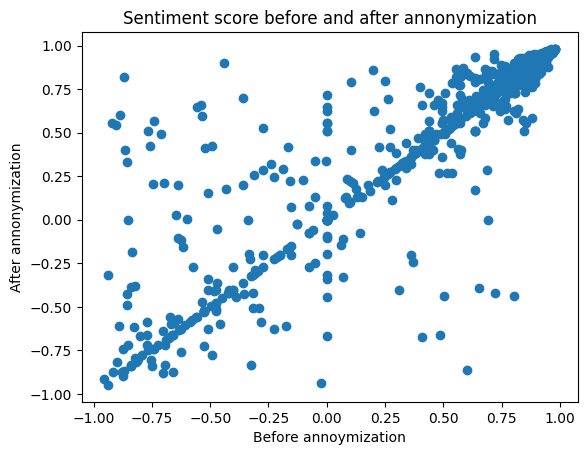

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_21['txt_vader_sentiment_pred'], df_21['anon_txt_vader_sentiment_pred'])
plt.xlabel('Before annoymization')
plt.ylabel('After annonymization')
plt.title('Sentiment score before and after annonymization');


In [ ]:
utilization_utils.sentiment_test(df_2, 'txt')

0.7823076923076924

In [ ]:
utilization_utils.sentiment_test(df_2, 'anon_txt')

0.7771153846153847